*Practical Data Science 20/21*
# Programming Assignment 5 - Create your own App

Link zur App:

https://mybinder.org/v2/gh/nicolasleip/sneaker/HEAD?urlpath=%2Fvoila%2Frender%2FSneaker_App.ipynb

In this programming assignment you'll build a model that serves as a foundation for your own app. To this end, you will create your own dataset, build a deep learning model on this data, and deploy it!

In [ ]:
!pip install -Uqq fastai

     |████████████████████████████████| 194kB 11.9MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 


In [ ]:
#!pip install -Uqq fastai  # upgrade fastai on colab
from fastai.vision.all import *
from fastai.vision.widgets import *

__Google Drive integration__

If you want to store and access your downloaded data for this assignment you can use the following code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir /content/drive/My\ Drive/pds_a5
%cd /content/drive/My\ Drive/pds_a5

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/My Drive/pds_a5’: File exists
/content/drive/My Drive/pds_a5


## Develop an Application Idea

___Free your mind - this part is totally up to you.___

Think of an app that you'd like to build.
*   What useful app have you been missing?
*   Do you have any hobbies an app could be helpful for?
*   Is this a suitable classification or regression task? 
*   How could you get the data?


In [ ]:
# Write down your app idea here

You can get an inspiration from these Apps:

<table>
<tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/5.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/400">Guitar Classifier</a> by Christian Werner</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/6.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/340">Healthy or Not!</a> by Nikhil Utane </td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/7.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/333">Hummingbird Classifier</a> by Nissan Dookeran</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/8.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/409">Edible Mushroom?</a> by Ramon</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/9.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/387">Cousin Recognizer</a> by Charlie Harrington</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/10.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/386">Emotion Classifier</a> by Ethan Sutin and Team 26</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/11.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/350">American Sign Language</a> by Keyur Paralkar</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/12.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/355">Your City from Space</a> by Henri Palacci</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/13.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/367">Univariate TS as images using Gramian Angular Field</a> by Ignacio Oguiza</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/14.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/348">Face Expression Recognition</a> by Pierre Guillou</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/15.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/352">Tumor-normal sequencing</a> by Alena Harley</td><td>  </td>
</tr><table>

## Creating your own Dataset

Now you need to construct a dataset that allows you to train a model for your app. You learned about how to create a dataset in Lecture 7.

Here, you can follow the steps from the lecture or look into the following ressources:

*   A [tool](https://github.com/toffebjorkskog/ml-tools/blob/master/gi2ds.md) for excluding irrelevant images from Google Image Search results beforehand by @melonkernel
*   See this [post](https://www.christianwerner.net/tech/Build-your-image-dataset-faster/) about an alternative image downloader/cleaner by @cwerner
*   Of course, you can use your own data/images :) 

### 1. Dowload the data 
- You may use the helper functions from the lecture to get the image URLs
- Create a new folder at your defined `path`
- Use `download_image` to download the images into the corresponding (sub-)directories

In [ ]:
import requests
import re
import json
from fastcore.foundation import L

In [ ]:
shoe_types = "nike dunk low", "jordan 1 low"
path

In [ ]:
def search_images_ddg(key,max_n=200):
     """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """
     url        = 'https://duckduckgo.com/'
     params     = {'q':key}
     res        = requests.post(url,data=params)
     searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
     if not searchObj: print('Token Parsing Failed !'); return
     requestUrl = url + 'i.js'
     headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
     params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
     urls       = []
     while True:
         try:
             res  = requests.get(requestUrl,headers=headers,params=params)
             data = json.loads(res.text)
             for obj in data['results']:
                 urls.append(obj['image'])
                 max_n = max_n - 1
                 if max_n < 1: return L(set(urls))     # dedupe
             if 'next' not in data: return L(set(urls))
             requestUrl = url + data['next']
         except:
             pass

In [ ]:
ims = search_images_ddg("nike dunk low")

In [ ]:
pd.DataFrame({"urls": ims})

urls
0                                                                               https://www.jordanupdate.com/wp-content/uploads/2019/09/Nike-SB-Dunk-Low-Supreme-Jewel-Swoosh-Silver.jpg
1                                                                                 http://sneakernews.com/wp-content/uploads/2017/03/nike-sb-dunk-low-elite-sean-malto-release-info-1.jpg
2                                                                      https://i3.stycdn.net/images/2018/07/28/article/nike/so55456704/nike-dunk-low-w-schuhe-weiss-grau-1132-zoom-0.jpg
3                                                                            http://www.jumpmankicks.com/shoegallery/dunk/sb/2012/low_crown_royal/nike_dunk_low_pro_sb_crown_royal-2.jpg
4                                                                         https://sneakerbardetroit.com/wp-content/uploads/2020/05/Nike-Dunk-Low-Brazil-CU1727-700-2020-Release-Date.jpg
..                                                                                                                                                                                   ...
188                                                                  https://sneakernews.com/wp-content/uploads/2020/01/strangelove-skateboards-nike-sb-dunk-low-CT2552-800-6.jpg?w=1140
189                                                                                           https://sneakernews.com/wp-content/uploads/2019/07/nike-sb-dunk-low-russet-cedar.jpg?w=780
190  http://www.jumpmankicks.com/shoegallery/dunk/sb/2015/low_primitive_black_medium_grey_white_varsity_red/nike_dunk_low_premium_sb_primitive_black_medium_grey_white_varsity_red-1.jpg
191                                                                                                                                 https://i.ytimg.com/vi/JqMMH0JJaOk/maxresdefault.jpg
192                                                                              https://i3.stycdn.net/images/2011/04/13/article/nike/so5515401/nike-dunk-low-schuhe-white-navy-1550.jpg

[193 rows x 1 columns]

In [ ]:
dest = "nikedunk.jog"
download_url(ims[0], dest)

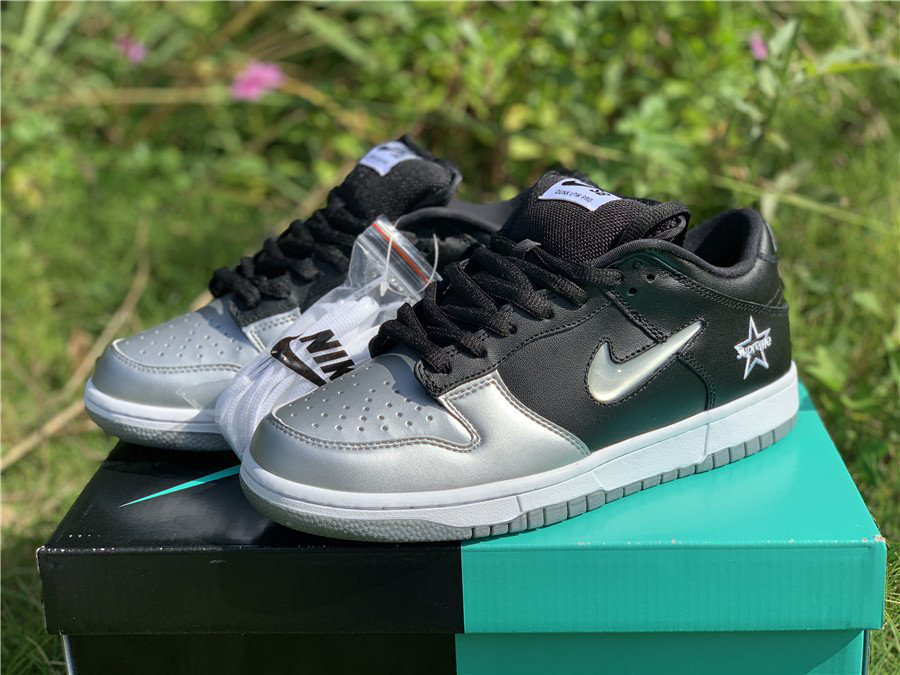

In [ ]:
im = Image.open(dest)
im

In [ ]:
shoe_types = 'nike dunk low', 'jordan 1 low'
path = Path('shoes')

In [ ]:
if not path.exists(): path.mkdir()
for s in shoe_types:
  dest = (path/s)
  dest.mkdir(exist_ok=True)
  results = search_images_ddg(f'{s} shoe')
  download_images(dest, urls=results)

### 2. Verify Images
- First, create a list of all your images
- Use `verify_images` and `unlink` to remove broken images

In [ ]:
fns = get_image_files(path)
fns

(#312) [Path('shoes/nike dunk low/00000003.jpg'),Path('shoes/nike dunk low/00000008.jpg'),Path('shoes/nike dunk low/00000005.jpg'),Path('shoes/nike dunk low/00000000.jpg'),Path('shoes/nike dunk low/00000009.jpg'),Path('shoes/nike dunk low/00000006.jpg'),Path('shoes/nike dunk low/00000010.jpg'),Path('shoes/nike dunk low/00000011.jpg'),Path('shoes/nike dunk low/00000004.jpg'),Path('shoes/nike dunk low/00000002.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

In [ ]:
failed.map(Path.unlink)

### 3. Create the DataBlock
For this, you need to think of:
- What kinds of data we are working with
- How to get the list of items
- How to label these items
- How to create the validation set

Use `RandomResizedCrop` for `item_tfms`with an image size of 224 px, and the appropriate `aug_transforms` as `batch_tfms`.

### 4. Create the DataLoaders

In [ ]:
shoes = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms = Resize(224)
)

In [ ]:
dls = shoes.dataloaders(path)

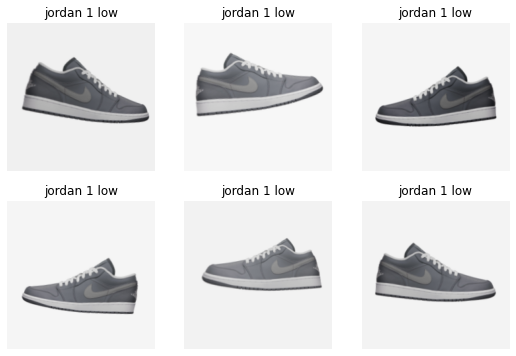

In [ ]:
shoes = shoes.new(item_tfms=Resize(224), batch_tfms=aug_transforms())
dls = shoes.dataloaders(path)
dls.train.show_batch(max_n=6, nrows=2, unique=True)

### 5. Take a look at some of your pictures. 
Does everything look as expected?

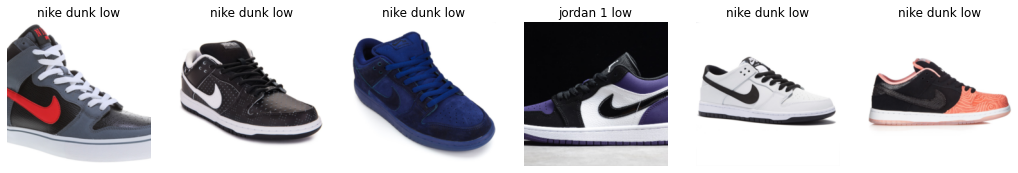

In [ ]:
dls.valid.show_batch(max_n=6, nrows=1)

## Modeling

### 6. Create a learner

Create an appropriate learner for your data
- Choose an appropriate model [architecture](https://fastai1.fast.ai/vision.models.html)
- Choose appropriate [metrics](https://docs.fast.ai/metrics.html) for your task

In [ ]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=7.585775847473997e-07)

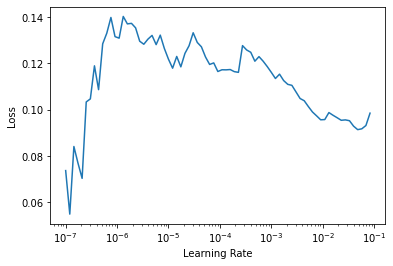

In [ ]:
learn.lr_find()

### 7. Fit the model

Use your knowdledge on model training to fit your model!

In [ ]:
class SaveBestModel(Recorder):
    def __init__(self, learn,name='best_shoe_modell'):
        super().__init__(learn)
        self.name = name
        self.best_loss = None
        self.best_acc = None
        self.save_method = self.save_when_acc
        
    def save_when_acc(self, metrics):        
        loss, acc = metrics[0], metrics[1]
        if self.best_acc == None or acc < self.best_acc:
            self.best_acc = acc
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Save the best accuracy {:.5f}".format(self.best_acc))
        elif acc == self.best_acc and  loss < self.best_loss:
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Accuracy is eq,Save the lower loss {:.5f}".format(self.best_loss))
            
    #def on_epoch_end(self,last_metrics,**kwargs:Any):
     #   self.save_method(last_metrics)

In [ ]:
learn.fit_one_cycle(lr_max=0.001, n_epoch=10, cbs=SaveModelCallback)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Better model found at epoch 0 with valid_loss value: 2.741266965866089.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Better model found at epoch 1 with valid_loss value: 1.3705004453659058.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Better model found at epoch 2 with valid_loss value: 0.6421090364456177.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Better model found at epoch 3 with valid_loss value: 0.4077446162700653.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Better model found at epoch 4 with valid_loss value: 0.32065755128860474.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Better model found at epoch 5 with valid_loss value: 0.31115323305130005.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Better model found at epoch 6 with valid_loss value: 0.29482710361480713.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Better model found at epoch 7 with valid_loss value: 0.2797369360923767.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Better model found at epoch 8 with valid_loss value: 0.26866021752357483.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


### 8. Evaluate the model

You' ve already seen many ways to evaluate a model. Evaluate your model in a qualitative and quantitative manner.

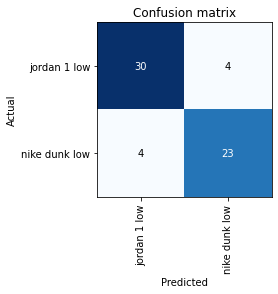

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

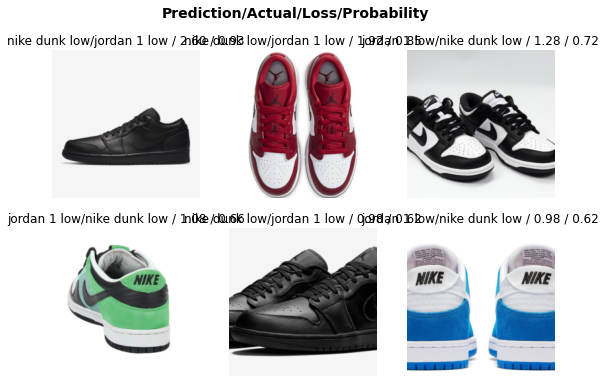

In [ ]:
interp.plot_top_losses(6, nrows=2)

### 9. Clean your data

Based on the evaluation, you may want to clean your data using the `ImageClassifierCleaner`.
- Remeber to delete the selected data after using the cleaner:
    ```python
    for idx in cleaner.delete(): cleaner.fns[idx].unlink()
    ```
    
    
- Once we've cleaned up our data, we can retrain our model. 



In [ ]:
from fastai.vision.widgets import *


In [ ]:
cleaner=ImageClassifierCleaner(learn)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

## Turning Your Model into an Online Application

Now, take your app into production. You can follow the steps from the lecure:

- Export your model via `learn.export`
- Upload your model to [Github Releases](https://docs.github.com/en/free-pro-team@latest/github/administering-a-repository/about-releases) to make it publicly available at your repository.
- Create and upload a new notebook that only contains the necassary code and IPython widgets for your App. 
    - Remeber to download the exported model from *Github Releases*
    - Include a brief description of your app and the functionalities
- Publish your web app on [Binder](https://mybinder.org/) using Voilà

You can use the [example](https://github.com/pds2021/course/blob/main/nbs/07_Bear_App.ipynb) from the lecture as an orientation.

If you're familiar with the world of web application development, you're free to use these skills and all your tools and ressources!

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/"export.pkl")

## Finally, Provide a Link to Your App

Link zur App: 

https://hub.gke2.mybinder.org/user/nicolasleip-sneaker-5j8puxow/voila/render/Sneaker_App.ipynb?token=aJJx7VCXTPaMi3ZSGrBa5g

In [ ]:
from fastai.vision.widgets import *

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

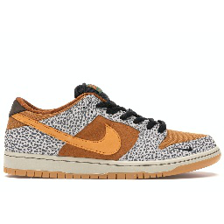

In [ ]:
img = PILImage.create(btn_upload.data[-1])
img.to_thumb(224,224)

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(224,224))
out_pl

Output()

In [ ]:
pred, pred_idx, probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: nike dunk low; Probability: 0.9993')

In [ ]:
btn_run = widgets.Button(description = "Classify")
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(224,224))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
VBox([widgets.Label("Select Sneaker Model (Jordan 1 Low / Nike Dunk Low)"),
     btn_upload, btn_run, out_pl, lbl_pred])